In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

2025-03-28 00:12:37.561330: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-28 00:12:37.572433: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-28 00:12:37.575620: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-28 00:12:37.584019: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-28 00:12:38.192125: W tensorflow/compiler/tf2

In [2]:
df = pd.read_csv("Reviews_v2.csv")
print(df.shape)
df = df.dropna()
# Loại bỏ các dòng trùng lặp dựa trên cột "Text"
df = df.drop_duplicates(subset="Text")
print(df.shape)

(568454, 2)
(393579, 2)


In [3]:
def clean_text(text):
    if not isinstance(text, str):
        return text  # Trả về nguyên bản nếu không phải chuỗi
    
    words = text.split()  # Tách thành danh sách từ
    cleaned_words = [
        word for word in words
        if not word.startswith("@") and
        not word.startswith("#") and
        "http" not in word and
        "www" not in word and
        ("@" not in word or word.count("@") > 1)  # Loại bỏ email (nhưng giữ lại @ nếu có hơn 1 ký tự @)
    ]
    
    return " ".join(cleaned_words).strip()

df["Cleaned_Text"] = df["Text"].apply(clean_text)
df.head(1)

,Score,Text,Cleaned_Text
0,5,I have bought several of the Vitality canned d...,I have bought several of the Vitality canned d...


In [4]:
def get_sentiment(score): 
    if score > 3:
        return 2
    elif score < 3:
        return 0
    else:
        return 1
df["label"] = df["Score"].apply(get_sentiment)
print(df.head(1))

   Score                                               Text  \
0      5  I have bought several of the Vitality canned d...   

                                        Cleaned_Text  label  
0  I have bought several of the Vitality canned d...      2  


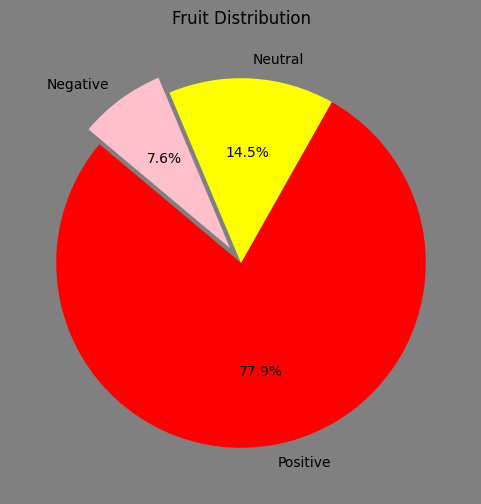

In [5]:
label_count = df['label'].value_counts()
label_count = ((np.array(label_count)/len(df))*100).reshape(-1)
labels = ['Positive', 'Neutral', 'Negative']
colors = ['red', 'yellow', 'pink']
explode = (0, 0, 0.1)

plt.figure(figsize=(6, 6),facecolor='gray')  # Kích thước
plt.pie(label_count, labels=labels, autopct='%1.1f%%', colors=colors, explode=explode, startangle=140)

# Tiêu đề
plt.title('Fruit Distribution')

# Hiển thị biểu đồ
plt.show()

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import MultiHeadAttention,Embedding,Dense,Activation,Flatten,Input,BatchNormalization,Dropout,GlobalAveragePooling1D,Concatenate,MultiHeadAttention,LayerNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.metrics import F1Score,Recall,Precision,CategoricalAccuracy
from pyvi import ViTokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import sys
import pandas as pd 
from tensorflow.keras import regularizers
from tensorflow.keras.constraints import max_norm
import tensorflow.keras.backend as K
from sklearn.utils import shuffle
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from tensorflow.keras.callbacks import Callback
from sklearn.utils.class_weight import compute_class_weight

In [7]:
data_x_ = df["Cleaned_Text"]
data_y_ = df["label"]
# total_len = np.array([len(i) for i in data_x_])
# print(total_len[0:10])
# total_len = int(np.mean(total_len))
# print(total_len)

In [8]:

num_classes = 3  # Số lượng lớp
data_y_ = tf.keras.utils.to_categorical(data_y_, num_classes)

vectorizer = TextVectorization(
    max_tokens=40000,
    standardize='lower_and_strip_punctuation',
    output_mode='int',
    output_sequence_length=200
)

vectorizer.adapt(data_x_)
data_x_ = vectorizer(data_x_)
data_x_ = np.array(data_x_)
data_y_ = np.array(data_y_)

I0000 00:00:1743095565.467932   10672 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1743095565.496238   10672 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1743095565.496291   10672 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1743095565.499023   10672 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1743095565.499080   10672 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

In [9]:
print(data_y_[0])
print(data_x_[0])

[0. 0. 1.]
[   3   17  118  306    8    2 6872  558  121   67  198    4   17  110
   29   42    6   31    8   30  180    2   41  635   48   27    5 2679
   57    5 1193  470    4    7  663   97   13 6554    9 2302    4  112
 8794   10   41   97   57  139    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0 

In [10]:
x_train, x_test, y_train, y_test = train_test_split(data_x_, data_y_, test_size=0.3, shuffle=True, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, shuffle=True, random_state=42)
print(f"Train data: {x_train.shape}")
print(f"Train label: {y_train.shape}")
print(f"Test data: {x_test.shape}")
print(f"Test label: {y_test.shape}")
print(f"Val data: {x_val.shape}")
print(f"Val label: {y_val.shape}")

Train data: (275505, 200)
Train label: (275505, 3)
Test data: (59037, 200)
Test label: (59037, 3)
Val data: (59037, 200)
Val label: (59037, 3)


In [11]:
print(f"Train data: {x_train.shape}")
print(f"Train label: {y_train.shape}")
print(f"Test data: {x_test.shape}")
print(f"Test label: {y_test.shape}")
print(f"Val data: {x_val.shape}")
print(f"Val label: {y_val.shape}")

Train data: (275505, 200)
Train label: (275505, 3)
Test data: (59037, 200)
Test label: (59037, 3)
Val data: (59037, 200)
Val label: (59037, 3)


In [12]:
# @register_keras_serializable
class PositionEmbedding(tf.keras.layers.Layer):
    def __init__(self, sequence_length, d_model,name_,trainable=True,dtype="float32"):
        super().__init__(name=name_,trainable=trainable,dtype=dtype)
        self.pos_emb = self.add_weight(
            shape=(sequence_length, d_model),  # Ma trận vị trí (số đặc trưng x d_model)
            initializer="random_normal",
            trainable=True,
            name="position_embedding"
        )

    def call(self, inputs, training=True):
        return inputs + self.pos_emb  # Cộng thẳng vào embedding    

# @register_keras_serializable
class encode(tf.keras.layers.Layer):
    def __init__(self, deep_, num_head_, dropout_rate_, name_,trainable=True,dtype="float32"):
        super(encode, self).__init__(name=name_,trainable=trainable,dtype=dtype)
        self.attention_ = MultiHeadAttention(num_heads = num_head_, key_dim = deep_)
        self.dense_ = Dense(deep_,kernel_regularizer = regularizers.l2(0.001),kernel_constraint=max_norm(3), activation='relu')
        self.l1_ = LayerNormalization(epsilon=1e-6)
        self.dr1_ = Dropout(dropout_rate_)
        self.l2_ = LayerNormalization(epsilon=1e-6)
        self.dr2_ = Dropout(dropout_rate_)

    def call(self, input, training=True):
        x1_ = self.attention_(input[0],input[0])
        # x2_ = self.dr1_(x1_)
        x3_ = self.l1_(x1_+input[1])

        x4_ = self.dense_(x3_)
        # x5_ = self.dr2_(x4_)
        x6_ = self.l2_(x4_+x3_)

        return x6_
class output(tf.keras.layers.Layer):
    def __init__(self, dropout_rate, deep_, name_,trainable=True,dtype="float32"):
        super(output, self).__init__(name=name_,trainable=trainable,dtype=dtype)
        self.dense_out1_ = Dense(deep_)
        self.l_out1_ = LayerNormalization(epsilon=1e-6)
        self.d_out1_ = Dropout(0.2)

    def call(self, input, training=True):
        x_ = self.dense_out1_(input)
        x_ = self.l_out1_(x_)
        x_ = self.d_out1_(x_)
        
        return x_

In [13]:
input_ = Input(shape=(200,))

embed_full_ = Embedding(input_dim=40000, output_dim=16, name = "embed")(input_)
embed_full_ = Dense(256, use_bias=False, name="embed_dense")(embed_full_)

pos_ = PositionEmbedding(sequence_length=200, d_model = 256,name_ = "pos_1")(embed_full_)

encode1_ = encode(deep_ = 256, num_head_ = 4, dropout_rate_ = 0.2, name_="encode_1")([pos_,pos_])

flatten_ = GlobalAveragePooling1D(name="flatten_1")(encode1_)

out1_ = output(dropout_rate = 0.2, deep_ = 256, name_ = "ffn_output_1")(flatten_)

out_full_ = Dense(3,activity_regularizer = regularizers.l2(0.0001),activation='softmax',name="output")(out1_)

model_ = Model(input_,out_full_,name="test_model")
model_.summary()

Model: "test_model"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 200)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embed (Embedding)   │ (None, 200, 16)   │    640,000 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embed_dense (Dense) │ (None, 200, 256)  │      4,096 │ embed[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pos_1               │ (None, 200, 256)  │     51,200 │ embed_dense[0][0] │
│ (PositionEmbedding) │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encode_1 (encode)   │ (None, 200, 256)  │  1,118,720 │ pos_1[0][0],      │
│                     │                   │            │ pos_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1           │ (None, 256)       │          0 │ encode_1[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ffn_output_1        │ (None, 256)       │     66,304 │ flatten_1[0][0]   │
│ (output)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 3)         │        771 │ ffn_output_1[0][… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,881,091 (7.18 MB)

 Trainable params: 1,881,091 (7.18 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
threshold_ = 0.5

loss = tf.keras.losses.CategoricalCrossentropy()
opt = tf.keras.optimizers.Adam()


class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name="f1_score", num_classes=3, **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.num_classes = num_classes
        self.true_positives = self.add_weight(name="tp", shape=(num_classes,), initializer="zeros")
        self.false_positives = self.add_weight(name="fp", shape=(num_classes,), initializer="zeros")
        self.false_negatives = self.add_weight(name="fn", shape=(num_classes,), initializer="zeros")

    def update_state(self, y_true, y_pred, sample_weight=None):
        # Chuyển one-hot thành label (nếu cần)
        y_pred = tf.argmax(y_pred, axis=1)
        y_true = tf.argmax(y_true, axis=1)

        for i in range(self.num_classes):
            tp = tf.reduce_sum(tf.cast(tf.logical_and(y_pred == i, y_true == i), tf.float32))
            fp = tf.reduce_sum(tf.cast(tf.logical_and(y_pred == i, y_true != i), tf.float32))
            fn = tf.reduce_sum(tf.cast(tf.logical_and(y_pred != i, y_true == i), tf.float32))

            self.true_positives.assign_add(tp)
            self.false_positives.assign_add(fp)
            self.false_negatives.assign_add(fn)

    def result(self):
        precision = self.true_positives / (self.true_positives + self.false_positives + tf.keras.backend.epsilon())
        recall = self.true_positives / (self.true_positives + self.false_negatives + tf.keras.backend.epsilon())
        f1 = 2 * (precision * recall) / (precision + recall + tf.keras.backend.epsilon())

        return tf.reduce_mean(f1)  # Macro F1-score

    def reset_state(self):
        self.true_positives.assign(tf.zeros_like(self.true_positives))
        self.false_positives.assign(tf.zeros_like(self.false_positives))
        self.false_negatives.assign(tf.zeros_like(self.false_negatives))
        
def focal_loss(alpha=None, gamma=2.0):
    """
    Hàm focal loss cho nhãn one-hot.
    
    - alpha: List hoặc tensor có kích thước (num_classes,) để điều chỉnh trọng số từng class. 
      Ví dụ: alpha=[0.25, 0.25, 0.5] nếu có 3 class.
    - gamma: Tham số điều chỉnh độ nhạy của loss.

    """
    def loss_fn(y_true, y_pred):
        # Đảm bảo y_pred nằm trong khoảng (0,1)
        y_pred = tf.clip_by_value(y_pred, 1e-7, 1.0 - 1e-7)
        
        # Tính focal loss
        cross_entropy = -y_true * tf.math.log(y_pred)  # Cross entropy với one-hot labels
        focal_weight = (1 - y_pred) ** gamma  # Focal weight
        
        focal_loss = focal_weight * cross_entropy  # Nhân focal weight vào cross-entropy

        # Nếu có alpha, nhân thêm trọng số class
        if alpha is not None:
            alpha_tensor = tf.constant(alpha, dtype=tf.float32)  # Chuyển alpha thành tensor
            focal_loss *= alpha_tensor  # Nhân trọng số từng class

        return tf.reduce_sum(focal_loss, axis=1)  # Tổng loss trên từng sample

    return loss_fn

In [19]:
model_.compile(optimizer=opt,loss=focal_loss(alpha=[0.28, 0.5, 0.19]),metrics=[F1Score(num_classes=3),CategoricalAccuracy(),Recall(),Precision()])

In [20]:
h_ = model_.fit(
    x_train,y_train,
    epochs = 5,
    validation_data = (x_val,y_val)
) 

Epoch 1/5
8610/8610 ━━━━━━━━━━━━━━━━━━━━ 129s 14ms/step - categorical_accuracy: 0.8902 - f1_score: 0.8902 - loss: 0.0324 - precision_1: 0.9347 - recall_1: 0.8395 - val_categorical_accuracy: 0.8397 - val_f1_score: 0.8397 - val_loss: 0.0570 - val_precision_1: 0.8937 - val_recall_1: 0.7810
Epoch 2/5
8610/8610 ━━━━━━━━━━━━━━━━━━━━ 119s 14ms/step - categorical_accuracy: 0.8959 - f1_score: 0.8959 - loss: 0.0306 - precision_1: 0.9366 - recall_1: 0.8499 - val_categorical_accuracy: 0.8231 - val_f1_score: 0.8231 - val_loss: 0.0594 - val_precision_1: 0.8738 - val_recall_1: 0.7635
Epoch 3/5
8610/8610 ━━━━━━━━━━━━━━━━━━━━ 120s 14ms/step - categorical_accuracy: 0.9003 - f1_score: 0.9003 - loss: 0.0289 - precision_1: 0.9384 - recall_1: 0.8568 - val_categorical_accuracy: 0.8344 - val_f1_score: 0.8344 - val_loss: 0.0593 - val_precision_1: 0.8819 - val_recall_1: 0.7807
Epoch 4/5
8610/8610 ━━━━━━━━━━━━━━━━━━━━ 120s 14ms/step - categorical_accuracy: 0.9050 - f1_score: 0.9050 - loss: 0.0273 - precision_1: 

1845/1845 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step


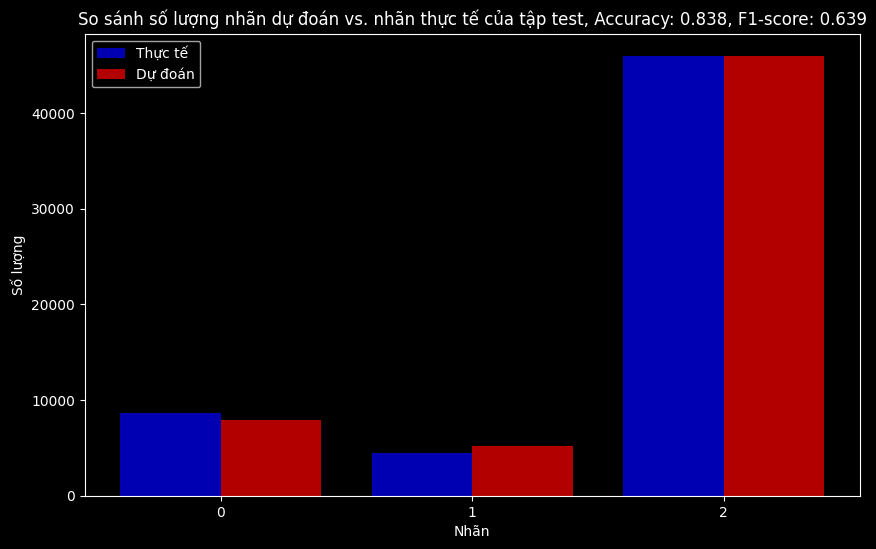

8610/8610 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step


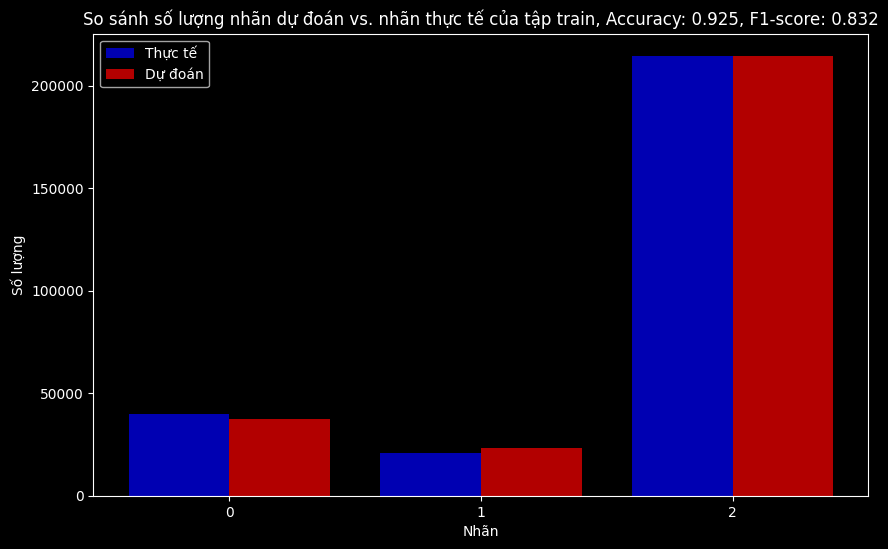

1845/1845 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step


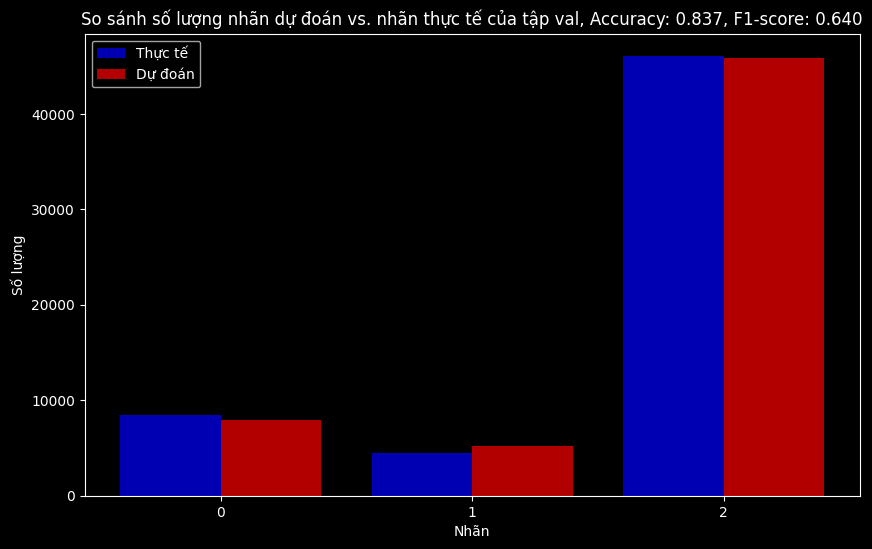

In [21]:
from sklearn.metrics import accuracy_score, f1_score
def draw(x_test,y_test,key):
    y_pred_prob = model_.predict(x_test)
    y_pred = np.argmax(y_pred_prob, axis=1)
    y_all = np.argmax(y_test, axis=1)
    unique_labels = np.unique(y_all)
    true_counts = np.bincount(y_all, minlength=len(unique_labels))
    pred_counts = np.bincount(y_pred, minlength=len(unique_labels))
    x_labels = [str(label) for label in unique_labels]
    x = np.arange(len(unique_labels))
    acc = accuracy_score(y_all, y_pred)
    f1 = f1_score(y_all, y_pred, average='macro') 
    plt.style.use("dark_background")
    plt.figure(figsize=(10, 6))
    plt.bar(x - 0.2, true_counts, width=0.4, label="Thực tế", color="blue", alpha=0.7)
    plt.bar(x + 0.2, pred_counts, width=0.4, label="Dự đoán", color="red", alpha=0.7)
    
    plt.xticks(x, x_labels)
    plt.xlabel("Nhãn")
    plt.ylabel("Số lượng")
    plt.title(f"So sánh số lượng nhãn dự đoán vs. nhãn thực tế của tập {key}, Accuracy: {acc:.3f}, F1-score: {f1:.3f}")
    plt.legend()
    plt.show()

    
draw(x_test,y_test,"test")
draw(x_train,y_train,"train")
draw(x_val,y_val,"val")